In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Day_2_Stock_Data/All_Stocks_Data.csv")

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Symbol,Asset_type,Name
0,2024-01-16,22080.500000,22124.150391,21969.800781,22032.300781,292400,^NSEI,Index,NIFTY_50
1,2024-01-17,21647.250000,21851.500000,21550.449219,21571.949219,456000,^NSEI,Index,NIFTY_50
2,2024-01-18,21414.199219,21539.400391,21285.550781,21462.250000,387300,^NSEI,Index,NIFTY_50
3,2024-01-19,21615.199219,21670.599609,21575.000000,21622.400391,343100,^NSEI,Index,NIFTY_50
4,2024-01-23,21716.699219,21750.250000,21192.599609,21238.800781,449700,^NSEI,Index,NIFTY_50
5,2024-01-24,21185.250000,21482.349609,21137.199219,21453.949219,407500,^NSEI,Index,NIFTY_50
6,2024-01-25,21454.599609,21459.000000,21247.050781,21352.599609,418100,^NSEI,Index,NIFTY_50
7,2024-01-29,21433.099609,21763.250000,21429.599609,21737.599609,376700,^NSEI,Index,NIFTY_50
8,2024-01-30,21775.750000,21813.050781,21501.800781,21522.099609,375100,^NSEI,Index,NIFTY_50
9,2024-01-31,21487.250000,21741.349609,21448.849609,21725.699219,410600,^NSEI,Index,NIFTY_50


In [7]:
df['MA_20'] = df['Close'].rolling(window=20).mean()

In [8]:
delta = df['Close'].diff()
gain = delta.clip(lower=0)
lose = delta.clip(upper=0)
avg_gain = gain.rolling(window=14).mean()
avg_lose = lose.rolling(window=14).mean().abs()
rs = avg_gain / avg_lose
df['RSI'] = 100 - (100 / (1+rs))

In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Symbol,Asset_type,Name,MA_20,RSI
2467,2026-01-08,944.700012,953.000000,941.400024,946.700012,21928849,HDFCBANK.NS,Stock,HDFCBANK,985.695001,26.821960
2468,2026-01-09,945.000000,950.599976,933.299988,939.000000,38183839,HDFCBANK.NS,Stock,HDFCBANK,982.570001,22.701753
2469,2026-01-12,937.500000,942.000000,929.599976,936.950012,21071666,HDFCBANK.NS,Stock,HDFCBANK,979.612503,13.782620
2470,2026-01-13,947.700012,947.700012,932.599976,937.349976,32042827,HDFCBANK.NS,Stock,HDFCBANK,976.765002,13.572640
2471,2026-01-14,930.000000,940.049988,920.200012,925.450012,36688248,HDFCBANK.NS,Stock,HDFCBANK,973.837503,11.855317


In [10]:
high_low = df['High'] - df['Low']
high_close = (df['High'] - df['Close'].shift()).abs()
low_close = (df['Low'] - df['Close'].shift()).abs()
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df['ATR'] = true_range.rolling(window=14).mean()


In [11]:
df['VMAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()

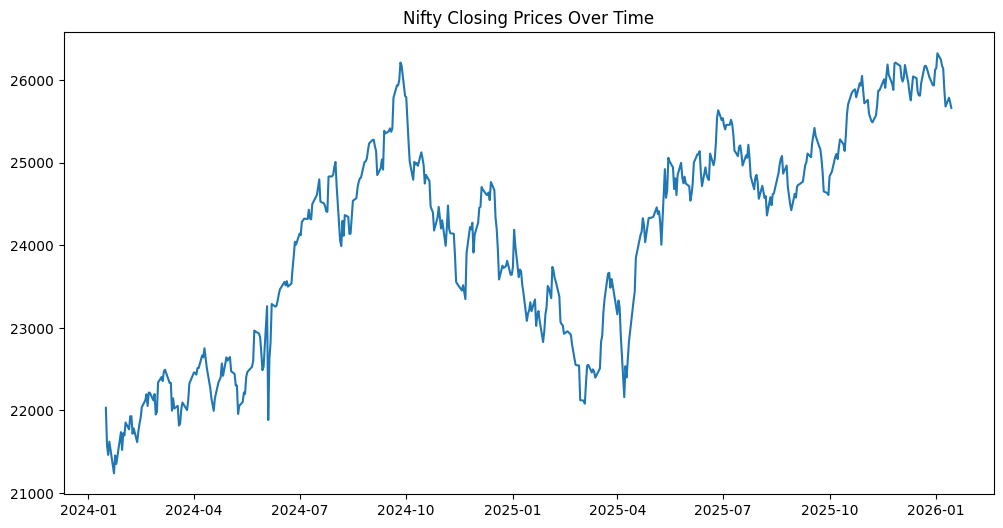

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
nifty_df = df[df["Symbol"] == "^NSEI"]

plt.figure(figsize=(12,6))
plt.plot(nifty_df['Date'] , nifty_df['Close'])
plt.title('Nifty Closing Prices Over Time')
plt.show()

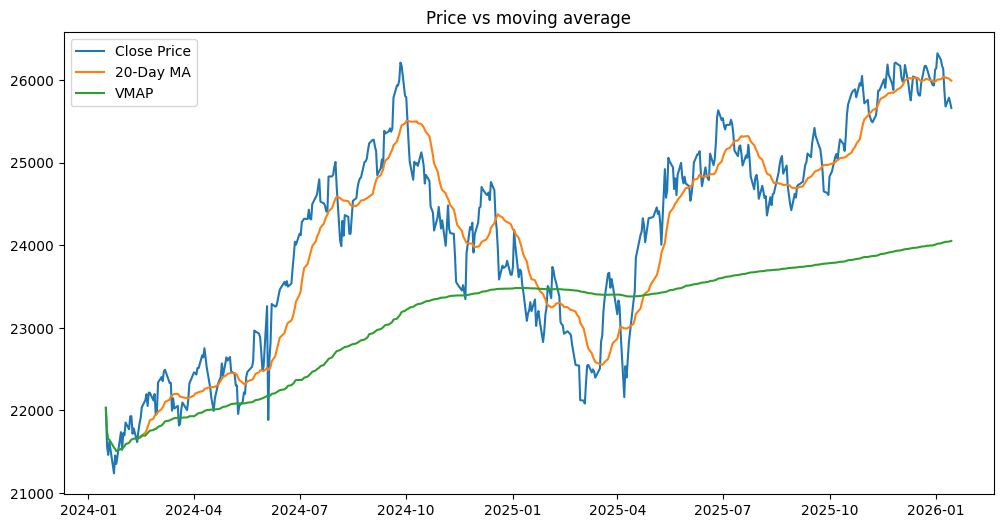

In [17]:
plt.figure(figsize=(12,6))
plt.plot(nifty_df['Date'] , nifty_df['Close'] , label='Close Price')
plt.plot(nifty_df['Date'] , nifty_df['MA_20'] , label='20-Day MA')
plt.plot(nifty_df['Date'] , nifty_df['VMAP'] , label='VMAP')
plt.title("Price vs moving average")
plt.legend()
plt.show()

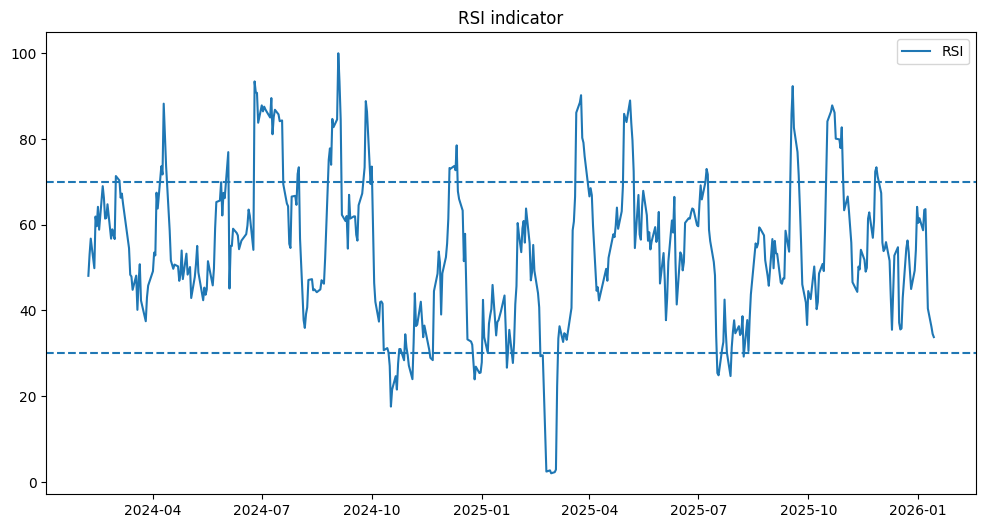

In [14]:
plt.figure(figsize=(12,6))
plt.plot(nifty_df['Date'] , nifty_df['RSI'] , label='RSI')
plt.axhline(70 , linestyle='--')
plt.axhline(30 , linestyle='--')
plt.title("RSI indicator")
plt.legend()
plt.show()

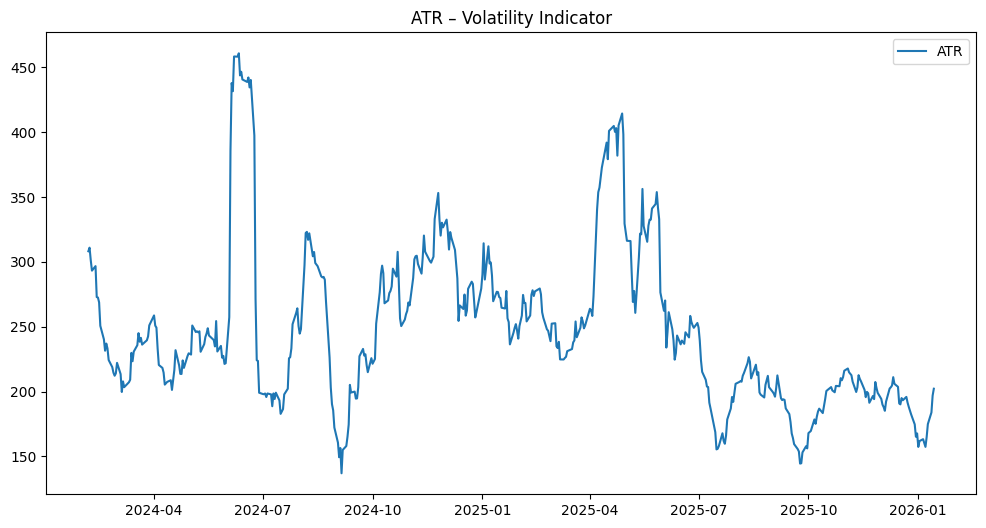

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(nifty_df["Date"], nifty_df["ATR"], label="ATR")
plt.title("ATR – Volatility Indicator")
plt.legend()
plt.show()
